#### Case 2: Liquid hydrogen ($LH_2$) in a 2033 $\text{m}^3$ tank

This application corresponds to liquid hydrogen storage in the NASA's Space Launch System. It consists of a 2033 $m^3$ storage tank [NASA](https://www.energy.gov/sites/default/files/2021-10/new-lh2-sphere.pdf) in a tank with 8.4 m diameter and 40 m height. It will be assumed the following operation scenarios:

* Daily boil-off rate of 0.1%  
* Storage at atmospheric pressure with continuous removal of boil-off gas

For purposes of the example, it is assumed that the storage tank is passively insulated with perlite.

03/09/2024: Illustration of how to use SciPy to optimise

In [42]:
# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

#### Setup tank and cryogen properties


In [43]:
# Cylindrical storage tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 8 # Internal diameter / m
d_o = 8.4   # External diameter / m
T_air = 293.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 2e-2 # W/m2/K
U_V = 2e-2 # W/m2/K

# Specify heat transfer rate at the bottom
# This will represent the heat conduction from the piping system
Q_b = 100 # W, 
# Specify wall heat partitioning fraction
eta_w= 0.8

# Vertically orientated cylindrical tank volume
V_tank = 80 #m^3


# Initial liquid filling / Dimensionless
LF = 0.95

# Specify tank operating pressure
P = 101325 # Pa

# Initialize mid-scale tank
mid_tank = Tank(d_i, d_o, V_tank, LF)
mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w)

# Keep the tank roof insulated
mid_tank.U_roof = U_V

# Initialise cryogen
hydrogen = Cryogen(name = "hydrogen")
hydrogen.set_coolprops(P)

# Set cryogen
mid_tank.cryogen = hydrogen

Calculate initial evaporation rate and transient period

In [44]:
# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen.name + " is %.1f kg/h" % (mid_tank.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % mid_tank.tau)

# Minimum number of hours to achieve steady state 
tau_h = (np.floor(mid_tank.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h )

# Calculate boil-off rate
BOR = (mid_tank.b_l_dot * 24 * 3600) / (mid_tank.V * mid_tank.LF * mid_tank.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR * 100))
# Show dimensions of the tank
tank_h = mid_tank.l
print(f"Height:{np.round(tank_h)} m")

The initial evaporation rate of hydrogen is 2.6 kg/h
Transient period = 14631.045 s 
Simulation time: 5 h
BOR = 1.169 %
Height:2.0 m


### Simulation setup and execution

### Define optimisation parameters

In [45]:
# Define vertical spacing
dz = 0.1

# Calculate number of nodes
n_z = 1 + int(np.round(mid_tank.l_V/dz, 0))

# Define dimensionless computational grid
mid_tank.z_grid = np.linspace(0, 1, n_z)

# Define evaporation time as the transient period
hours = 24
evap_time = 3600 * hours

# Time step to plot each vapour temperature profile
mid_tank.plot_interval = evap_time/6

# Time step to record data, relevant for plotting integrated quantities such as
# the vapour to liquid heat transfer rate, Q_VL
mid_tank.time_interval = 60

# Show simulation duration and grid
print(f"Simulation time: {hours} h")
print(f"Grid length: {len(mid_tank.z_grid)}")

Simulation time: 12 h
Grid length: 2


In [23]:
# Generar rango de a (tasa de aspecto)
a = np.linspace(0.1,5,21)

for Aspect_R in a:
    mid_tank.d_i = ((4 * mid_tank.V)/(np.pi * Aspect_R))**(1/3)
    mid_tank.d_o = mid_tank.d_i + 0.2
    mid_tank.l = ((4 * mid_tank.V * Aspect_R**2)/(np.pi ))**(1/3)
    BOR = (mid_tank.b_l_dot * 24 * 3600) / (mid_tank.V * mid_tank.LF * mid_tank.cryogen.rho_L)
    print("BOR = %.3f %%" % (BOR * 100))
    print(f"Aspect Ratio:{Aspect_R:.3f}, Altura: {mid_tank.l:.3f} , Diametro interno:{mid_tank.d_i:.3f}, Volumen:{mid_tank.V} \n")

BOR = 4.187 %
Aspect Ratio:0.100, Altura: 1.006 , Diametro interno:10.062, Volumen:80 

BOR = 14.316 %
Aspect Ratio:0.345, Altura: 2.297 , Diametro interno:6.659, Volumen:80 

BOR = 24.473 %
Aspect Ratio:0.590, Altura: 3.285 , Diametro interno:5.568, Volumen:80 

BOR = 34.665 %
Aspect Ratio:0.835, Altura: 4.141 , Diametro interno:4.959, Volumen:80 

BOR = 44.888 %
Aspect Ratio:1.080, Altura: 4.916 , Diametro interno:4.552, Volumen:80 

BOR = 55.141 %
Aspect Ratio:1.325, Altura: 5.634 , Diametro interno:4.252, Volumen:80 

BOR = 65.422 %
Aspect Ratio:1.570, Altura: 6.309 , Diametro interno:4.018, Volumen:80 

BOR = 75.727 %
Aspect Ratio:1.815, Altura: 6.949 , Diametro interno:3.829, Volumen:80 

BOR = 86.056 %
Aspect Ratio:2.060, Altura: 7.561 , Diametro interno:3.670, Volumen:80 

BOR = 96.407 %
Aspect Ratio:2.305, Altura: 8.149 , Diametro interno:3.535, Volumen:80 

BOR = 106.779 %
Aspect Ratio:2.550, Altura: 8.717 , Diametro interno:3.418, Volumen:80 

BOR = 117.171 %
Aspect Ratio:2.

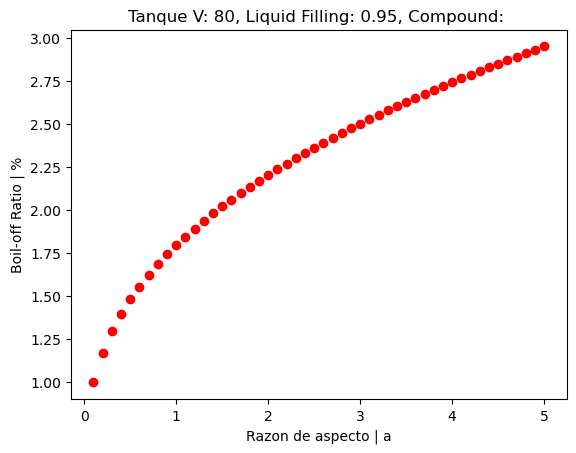

In [48]:
# Generar rango de a (tasa de aspecto)
a = np.linspace(0.1,5,50)
BOR_plot = []
for Aspect_R in a:
    d_i = ((4 * mid_tank.V)/(np.pi * Aspect_R))**(1/3)
    d_o = d_i + 0.4
    mid_tank = Tank(d_i, d_o, V_tank, LF)
    mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w)

    mid_tank.U_roof = U_V
    # Set cryogen
    mid_tank.cryogen = hydrogen
    BOR = (mid_tank.b_l_dot * 24 * 3600) / (mid_tank.V * mid_tank.LF * mid_tank.cryogen.rho_L)
    BOR_plot.append(BOR*100)
    # print("BOR = %.3f %%" % (BOR * 100))
    # print(f"Aspect Ratio:{Aspect_R:.3f}, Altura: {mid_tank.l:.3f} , Diametro interno:{mid_tank.d_i:.3f}, Volumen:{mid_tank.V} \n")

# Create a plot
plt.plot(a, BOR_plot,"ro")

# Add labels and title
plt.xlabel('Razon de aspecto | a')
plt.ylabel('Boil-off Ratio | %')
plt.title(f'Tanque V: {V_tank}, Liquid Filling: {LF}, Compound: ')

# Display the plot
plt.show()

In [ ]:
from scipy.optimize import Bounds, minimize

# Minimum and maximum practical ranges
# of initial liquid filling

# 5% represent ballast voyage
# 95% is the safety limit for potential liquid thermal expansion
bounds = Bounds([0.05], [0.95])

# Define objective function
def BOR_function(LF):

    # Update liquid filling
    mid_tank.LF = LF

    # Execute simulation
    mid_tank.evaporate(evap_time)

    # Calculate objective function
    f = 1 - mid_tank.data['V_L'][-1] / mid_tank.data['V_L'][0]
    
    print("LF = %.3f, f=%.3e" % (LF, f))
    return f    

# Initial liquid filling to optimise

x0 = 0.9 
res = minimize(BOR_function, x0, method='trust-constr', options={'verbose': 1}, bounds=bounds)

/tmp/ipykernel_745/4018950756.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("LF = %.3f, f=%.3e" % (LF, f))


LF = 0.900, f=3.294e-01
LF = 0.900, f=3.294e-01
LF = 0.245, f=1.031e+00
LF = 0.245, f=1.031e+00
LF = 0.879, f=3.357e-01
LF = 0.879, f=3.357e-01
LF = 0.853, f=3.441e-01
LF = 0.853, f=3.441e-01
LF = 0.850, f=3.450e-01
LF = 0.850, f=3.450e-01
LF = 0.850, f=3.449e-01
LF = 0.850, f=3.449e-01
LF = 0.851, f=3.447e-01
LF = 0.851, f=3.447e-01
LF = 0.852, f=3.445e-01
LF = 0.852, f=3.445e-01
LF = 0.852, f=3.443e-01
LF = 0.852, f=3.443e-01
LF = 0.853, f=3.441e-01
LF = 0.853, f=3.441e-01
LF = 0.853, f=3.439e-01
LF = 0.853, f=3.439e-01
LF = 0.915, f=3.251e-01
LF = 0.915, f=3.251e-01
LF = 0.948, f=3.158e-01
LF = 0.948, f=3.158e-01
LF = 0.937, f=3.189e-01
LF = 0.937, f=3.189e-01
LF = 0.930, f=3.207e-01
LF = 0.930, f=3.207e-01


In [17]:
res

           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 0.03330514065585943
                 x: [ 9.498e-01]
               nit: 39
              nfev: 68
              njev: 34
              nhev: 0
          cg_niter: 32
      cg_stop_cond: 1
              grad: [-2.913e-02]
   lagrangian_grad: [ 6.332e-11]
            constr: [array([ 9.498e-01])]
               jac: [<1x1 sparse matrix of type '<class 'numpy.float64'>'
                    	with 1 stored elements in Compressed Sparse Row format>]
       constr_nfev: [0]
       constr_njev: [0]
       constr_nhev: [0]
                 v: [array([ 2.913e-02])]
            method: tr_interior_point
        optimality: 6.331553684124636e-11
  constr_violation: 0.0
    execution_time: 4697.859582185745
         tr_radius: 83.96823234527197
    constr_penalty: 1.0
 barrier_parameter: 6.400000000000003e-06
 barrier_tolerance: 6.400000000000003e-06
             niter:

Global optimisation

In [ ]:
from scipy.optimize import Bounds, differential_evolution

# Minimum and maximum practical ranges
# of initial liquid filling
# 5% represent ballast voyage
# 95% is the safety limit for potential liquid thermal expansion
bounds = [(0.05, 0.95)]  # Bounds in differential_evolution are specified as a list of tuples

# Define objective function
def BOR_function(LF):

    # Update liquid filling
    mid_tank.LF = LF[0]  # LF is now an array, take the first element

    # Execute simulation
    mid_tank.evaporate(evap_time)

    # Calculate objective function
    f = 1 - mid_tank.data['V_L'][-1] / mid_tank.data['V_L'][0]
    
    print("LF = %.3f, f=%.3e" % (LF[0], f))
    return f    

# Perform global optimization using differential evolution
result = differential_evolution(BOR_function, bounds, strategy='best1bin', maxiter=1000, popsize=15, tol=1e-6, mutation=(0.5, 1), recombination=0.7, disp=True)

# Results
print("Best solution found: LF =", result.x[0])
print("Function value:", result.fun)


LF = 0.783, f=4.429e-01
LF = 0.142, f=1.219e+00
LF = 0.368, f=6.833e-01
LF = 0.435, f=6.172e-01
LF = 0.707, f=4.682e-01
LF = 0.560, f=5.319e-01
LF = 0.871, f=4.196e-01
LF = 0.723, f=4.617e-01
LF = 0.253, f=8.520e-01
LF = 0.318, f=7.461e-01
LF = 0.488, f=5.772e-01
LF = 0.199, f=9.915e-01
LF = 0.637, f=4.964e-01
LF = 0.934, f=4.050e-01
LF = 0.084, f=1.672e+00
LF = 0.760, f=4.514e-01
LF = 0.582, f=5.202e-01
LF = 0.554, f=5.358e-01
LF = 0.567, f=5.287e-01
LF = 0.500, f=5.681e-01
LF = 0.164, f=1.122e+00
LF = 0.887, f=4.163e-01
LF = 0.133, f=1.260e+00
LF = 0.937, f=4.048e-01
LF = 0.897, f=4.129e-01
LF = 0.103, f=1.489e+00
LF = 0.864, f=4.220e-01
LF = 0.931, f=4.054e-01
LF = 0.863, f=4.210e-01
LF = 0.904, f=4.114e-01
differential_evolution step 1: f(x)= 0.4047787838656154
LF = 0.934, f=4.047e-01
LF = 0.779, f=4.440e-01
LF = 0.473, f=5.859e-01
LF = 0.882, f=4.171e-01
LF = 0.925, f=4.068e-01
LF = 0.786, f=4.418e-01
LF = 0.801, f=4.378e-01
LF = 0.935, f=4.047e-01
LF = 0.600, f=5.110e-01
LF = 0.5

### Visualisation of results

#### Vapour temperature

In [ ]:
mid_tank.plot_tv(t_unit='h')

Visualise liquid and vapour heat ingresses, $\dot{Q}_{\text{L}}$ and  $\dot{Q}_{\text{V}}$.

The plot also shows the vapour to liquid heat ingress, $\dot{Q}_{VL}$, and  the partition of the vapour heat ingress that is transferred to the interface by the wall directly, $\dot{Q}_{\text{V,w}}$

In [ ]:
# Specify y-axis units as W, and time units to hours
mid_tank.plot_Q(unit = 'W', t_unit = 'h')

#### Plot liquid volume

In [ ]:
mid_tank.plot_V_L(t_unit='h')

#### Plot evaporation rate, $\dot{B}_{\text{L}}$, and boil-off gas rate, $\dot{B}_{}$

In [ ]:
mid_tank.plot_BOG(unit='kg/h', t_unit='h')

Optional: CSV data export

If evaporation data is intended to be post-processed in another software, it can be exported readily with the help of the Pandas package.

In [ ]:
# Import pandas 
import pandas as pd

Plot average vapour and boil-off gas temperature

In [ ]:
mid_tank.plot_tv_BOG(t_unit='h')

#### References

U.S. Department of Energy. (2021, October). DOE/NASA Advances in Liquid Hydrogen Storage Workshop. Retrieved from [https://www.energy.gov/sites/default/files/2021-10/new-lh2-sphere.pdf]